# 1. MODULO

In [1]:
# Importa el módulo 'os' para interactuar con el sistema de archivos y rutas del sistema operativo
import os

# Importa 'pandas' como 'pd', una biblioteca potente para manipulación y análisis de datos mediante DataFrames
import pandas as pd

# Importa el módulo 'datetime' para trabajar con fechas y horas de manera eficiente
import datetime

# 2. Rutas

In [2]:
R_Consoliado_Sat = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\SUBSIDIADO\consolidado año\SAT_EPS025_2025.TXT"
R_Historico = r"\\Servernas\AYC2\ASEGURAMIENTO\ASEGURAMIENTO\PROCESO_ASEGURAMIENTO\REGIMEN SUBSIDIADO\MUNICIPIOS 2025\HISTORICOS\20250629-HISTORICOS\HISTORICO_IDENTIFICACION_S_E.TXT"
R_Maestro = r"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\Procesos BDUA\Subsidiados\Maestro\MS\All\Max\2025_Máxim.txt"

Consolidado_Salida = "CS_Sat_RC.XLSX"
R_SALIDA = Fr"C:\Users\osmarrincon\OneDrive - uniminuto.edu\Capresoca\AlmostClear\SAT\{Consolidado_Salida}"

# 3. CARGUE DATAFRAME

In [3]:
df_sat = pd.read_csv(R_Consoliado_Sat, sep='|', encoding='ansi', dtype=str)
df_sat.head()

,COL1,COL2,COL3,COL4,COL5,COL6,COL7,COL8,COL9,COL10,...,COL77,COL78,COL79,COL80,COL81,COL82,COL83,COL84,COL85,COL86
0,01-01-2025,1,1,NI,891856000,Dec 31 2024 4:08AM,0,CAPRESOCA EPS,,,...,,,,,,,,,,
1,10-01-2025,1,1,NI,891856000,Jan 9 2025 4:07AM,39,CAPRESOCA EPS,,,...,,,,,,,,,,
2,10-01-2025,2,4,069CC3994868009012025150400002,2025-01-09T15:05:23,NaN,NaN,NaN,CC,39948680,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN
3,10-01-2025,3,4,069CC416046509012025141900003,2025-01-09T14:23:39,NaN,NaN,NaN,CC,4160465,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN
4,10-01-2025,4,14,069CC3994868009012025150400002,2025-01-09T15:05:23,NaN,NaN,NaN,CC,39948680,...,S,S,S,S,S,N,NaN,NaN,NaN,NaN


In [4]:
# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat[df_sat["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL2 COL3                            COL4  \
404   23-01-2025   16    4  069CC4249021622012025111600001   
405   23-01-2025   17   14  069CC4249021622012025111600001   
4572  27-06-2025    4    4  069CC4249021626062025151600017   
4573  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
404   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
405   2025-01-22T11:22:53  NaN  NaN  NaN   CC  42490216  ...     N     S   
4572  2025-06-26T15:18:48  NaN  NaN  NaN   CC  42490216  ...     N     S   
4573  2025-06-26T15:19:05  NaN  NaN  NaN   CC  42490216  ...     N     S   

     COL79 COL80 COL81 COL82 COL83 COL84 COL85 COL86  
404      S     S     S     N   NaN   NaN   NaN   NaN  
405      S     S     S     N   NaN   NaN   NaN   NaN  
4572     S     S     S     N   NaN   NaN   NaN   NaN  
4573     S     S     S     N   NaN   NaN   NaN   NaN  

[4 rows x 86 columns]


In [5]:
# Intenta con latin1
try:
    df_HI = pd.read_csv(R_Historico, sep=',', encoding='latin1', dtype=str, header=None)
    print("Archivo leído con éxito usando 'latin1'.")
except UnicodeDecodeError:
    print("Error con 'latin1'. Intentando con 'cp1252'.")
    # Si falla, intenta con cp1252
    df_HI = pd.read_csv(R_Historico, sep=',', encoding='cp1252', dtype=str, header=None)
    print("Archivo leído con éxito usando 'cp1252'.")

df_HI.head()

Archivo leído con éxito usando 'latin1'.


,0,1,2,3,4,5
0,104413898,CC,1073246014,02/08/2018,31/12/2999,EPS025
1,90652775,RC,1005065465,01/12/2005,26/06/2008,EPS025
2,94845649,CC,1193339663,01/12/2014,31/12/2999,EPS025
3,68213378,CC,9526502,16/12/2001,31/12/2999,EPS025
4,113416408,TI,1115865996,19/11/2024,31/12/2999,EPS025


In [6]:
df_Maestro = pd.read_csv(R_Maestro, sep=',', encoding='ansi', dtype=str)
df_Maestro.head()

,AFL_ID,ENT_ID,TPS_IDN_ID_CF,HST_IDN_NUMERO_IDENTIFICACION_CF,TPS_IDN_ID,HST_IDN_NUMERO_IDENTIFICACION,AFL_PRIMER_APELLIDO,AFL_SEGUNDO_APELLIDO,AFL_PRIMER_NOMBRE,AFL_SEGUNDO_NOMBRE,...,CND_AFL_FECHA_INICIO_2,GRP_FML_COTIZANTE_ID,PORTABILIDAD,COD_IPS_P,MTDLG_G_P,SUB_SISBEN_IV,MARCASISBENIV+MARCASISBENIII,CRUCE_BDEX_RNEC,nombre_archivo,fecha_maestro
0,117350752,EPS025,CC,1118562505,RC,1222137586,GAITAN,VIÑA,JESUS,MATEO,...,NaN,96457920,0,NaN,2,B01,SIV(B01),0,EPS025MS0030012025.TXT,30/01/2025
1,91099671,EPS025,NaN,NaN,RC,WXR0303747,CACHAY,MALDONADO,KAREN,NATALIA,...,20/02/2010,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0030012025.TXT,30/01/2025
2,69415144,EPS025,NaN,NaN,CC,4204689,CATAÑO,NaN,JOSE,ALBEIRO,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0030012025.TXT,30/01/2025
3,69407001,EPS025,NaN,NaN,CC,1111261,MALDONADO,ADAN,FRANCISCO,ASIS,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0030012025.TXT,30/01/2025
4,69410294,EPS025,NaN,NaN,CC,4205549,CATAÑO,ROJAS,FACUNDO,NaN,...,NaN,-1,0,NaN,NaN,NaN,NaN,0,EPS025MS0030012025.TXT,30/01/2025


# 4. LIMPIEZA DE DATOS

En esta sección, realizaremos un proceso de limpieza de datos para identificar inconsistencias y columnas que posiblemente no sean necesarias para el análisis. Esto incluye:

- Análisis de columnas vacías.
- Análisis de columnas de fechas.
- Identificación de posibles errores de tipificación.

## 4.1 Análisis de Columnas Vacías

En esta subsección, identificaremos las columnas que tienen un alto porcentaje de valores vacíos. Esto nos ayudará a decidir si estas columnas son relevantes para el análisis o si pueden ser eliminadas.

In [7]:
# Identificar posibles errores de tipificación
def identificar_errores_tipificacion(df):
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col].astype(float)
                print(f"Posible error: La columna '{col}' contiene valores numéricos pero está tipificada como texto.")
            except ValueError:
                pass
        elif df[col].dtype in ["int64", "float64"]:
            if df[col].apply(lambda x: isinstance(x, str)).any():
                print(f"Posible error: La columna '{col}' contiene texto pero está tipificada como numérica.")

# Aplicar la función al DataFrame
identificar_errores_tipificacion(df_sat)

Posible error: La columna 'COL3' contiene valores numéricos pero está tipificada como texto.
Posible error: La columna 'COL7' contiene valores numéricos pero está tipificada como texto.


## Análisis de Columnas de Fechas

En esta subsección, verificaremos las columnas que contienen fechas para identificar valores fuera de rango o inconsistencias en el formato.

In [8]:
# Identificar columnas de tipo fecha
def analizar_columnas_fechas(df):
    columnas_fecha = [col for col in df.columns if "fecha" in col.lower()]
    for col in columnas_fecha:
        print(f"Análisis de la columna: {col}")
        print(f"Rango de fechas: {df[col].min()} - {df[col].max()}")
        print(f"Valores únicos: {df[col].nunique()}")

# Aplicar la función al DataFrame
analizar_columnas_fechas(df_sat)

## Identificación de Errores de Tipificación

En esta subsección, revisaremos las columnas para identificar posibles errores de tipificación, como valores numéricos en columnas categóricas o texto en columnas numéricas.

In [9]:
# Calcular el porcentaje de valores vacíos por columna
def calcular_porcentaje_vacios(df):
    porcentaje_vacios = df.isnull().mean() * 100
    return porcentaje_vacios

# Aplicar la función al DataFrame y mostrar las columnas con más del 50% de valores vacíos
porcentaje_vacios = calcular_porcentaje_vacios(df_sat)
columnas_vacias = porcentaje_vacios[porcentaje_vacios > 50]

print("Columnas con más del 50% de valores vacíos:")
print(columnas_vacias)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat[df_sat["COL24"] == "42490216"]
print(registros_filtrados)

Columnas con más del 50% de valores vacíos:
COL6     68.210976
COL7     68.210976
COL8     68.210976
COL35    62.990021
COL45    70.349252
COL48    64.451176
COL49    82.234498
COL50    88.809694
COL51    88.774056
COL52    88.774056
COL53    88.774056
COL54    88.827512
COL55    88.898788
COL56    96.222381
COL57    88.898788
COL58    96.222381
COL59    96.222381
COL60    96.222381
COL61    96.222381
COL62    96.222381
COL63    88.898788
COL65    96.222381
COL66    96.222381
COL75    95.598717
COL76    95.598717
COL83    68.371347
COL84    75.926586
COL85    69.529579
COL86    72.558803
dtype: float64
            COL1 COL2 COL3                            COL4  \
404   23-01-2025   16    4  069CC4249021622012025111600001   
405   23-01-2025   17   14  069CC4249021622012025111600001   
4572  27-06-2025    4    4  069CC4249021626062025151600017   
4573  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL6 COL7 COL8 COL9     COL10  ... COL77 COL78  \
404

## Eliminacion de Columnas Vacias

In [10]:
# Mostrar número de registros y columnas antes de eliminar
print("Antes de eliminar:")
print(f"Registros: {df_sat.shape[0]}, Columnas: {df_sat.shape[1]}")

# Eliminar columnas con más del 50% de valores vacíos
df_sat_limpio = df_sat.drop(columns=columnas_vacias.index)

# Mostrar número de registros y columnas después de eliminar
print("Después de eliminar:")
print(f"Registros: {df_sat_limpio.shape[0]}, Columnas: {df_sat_limpio.shape[1]}")

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Antes de eliminar:
Registros: 5612, Columnas: 86
Después de eliminar:
Registros: 5612, Columnas: 57
            COL1 COL2 COL3                            COL4  \
404   23-01-2025   16    4  069CC4249021622012025111600001   
405   23-01-2025   17   14  069CC4249021622012025111600001   
4572  27-06-2025    4    4  069CC4249021626062025151600017   
4573  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL9     COL10       COL11     COL12  COL13  ...  \
404   2025-01-22T11:22:53   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
405   2025-01-22T11:22:53   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
4572  2025-06-26T15:18:48   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
4573  2025-06-26T15:19:05   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   

           COL71       COL72  COL73    COL74 COL77 COL78 COL79 COL80 COL81  \
404   LABASTIDAS  LABASTIDAS  NANCY  BEATRIZ     N     S     S     S     S   
405   LABASTIDAS  LABASTIDAS  NANCY  BEATR

## VALIDAR EVOLUCIONES DC

In [11]:
# Mostrar número de registros vacíos en COL23 y COL24 antes del proceso
vacios_antes_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_antes_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 antes: {vacios_antes_col23}")
print(f"Registros vacíos en COL24 antes: {vacios_antes_col24}")

# Copiar valores de COL21 y COL22 a COL23 y COL24 cuando estén vacías
mask_col23 = df_sat_limpio['COL23'].isnull() | (df_sat_limpio['COL23'].str.strip() == '')
mask_col24 = df_sat_limpio['COL24'].isnull() | (df_sat_limpio['COL24'].str.strip() == '')

if 'COL21' in df_sat.columns and 'COL22' in df_sat.columns:
    df_sat_limpio.loc[mask_col23, 'COL23'] = df_sat.loc[df_sat_limpio.index[mask_col23], 'COL21']
    df_sat_limpio.loc[mask_col24, 'COL24'] = df_sat.loc[df_sat_limpio.index[mask_col24], 'COL22']

# Mostrar número de registros vacíos en COL23 y COL24 después del proceso
vacios_despues_col23 = df_sat_limpio['COL23'].isnull().sum() + (df_sat_limpio['COL23'].str.strip() == '').sum()
vacios_despues_col24 = df_sat_limpio['COL24'].isnull().sum() + (df_sat_limpio['COL24'].str.strip() == '').sum()
print(f"Registros vacíos en COL23 después: {vacios_despues_col23}")
print(f"Registros vacíos en COL24 después: {vacios_despues_col24}")

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Registros vacíos en COL23 antes: 1336
Registros vacíos en COL24 antes: 1336
Registros vacíos en COL23 después: 212
Registros vacíos en COL24 después: 212
            COL1 COL2 COL3                            COL4  \
404   23-01-2025   16    4  069CC4249021622012025111600001   
405   23-01-2025   17   14  069CC4249021622012025111600001   
4572  27-06-2025    4    4  069CC4249021626062025151600017   
4573  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL9     COL10       COL11     COL12  COL13  ...  \
404   2025-01-22T11:22:53   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
405   2025-01-22T11:22:53   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
4572  2025-06-26T15:18:48   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
4573  2025-06-26T15:19:05   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   

           COL71       COL72  COL73    COL74 COL77 COL78 COL79 COL80 COL81  \
404   LABASTIDAS  LABASTIDAS  NANCY  BEATRIZ     N     S     S    

## Eliminación Registros de actualización de datos

Actualización de datos y evoluciones

In [12]:
# Eliminar registros donde COL3 sea igual a "4" y "3"
df_sat_limpio = df_sat_limpio[~df_sat_limpio['COL3'].isin(["4", "3"])]

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL2 COL3                            COL4  \
405   23-01-2025   17   14  069CC4249021622012025111600001   
4573  27-06-2025    5   14  069CC4249021626062025151600017   

                     COL5 COL9     COL10       COL11     COL12  COL13  ...  \
405   2025-01-22T11:22:53   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   
4573  2025-06-26T15:19:05   CC  42490216  LABASTIDAS  DE PLATA  NANCY  ...   

           COL71       COL72  COL73    COL74 COL77 COL78 COL79 COL80 COL81  \
405   LABASTIDAS  LABASTIDAS  NANCY  BEATRIZ     N     S     S     S     S   
4573  LABASTIDAS  LABASTIDAS  NANCY  BEATRIZ     N     S     S     S     S   

     COL82  
405      N  
4573     N  

[2 rows x 57 columns]


## DEFINIR COLUMNAS

In [13]:
# Mostrar dimensiones antes de seleccionar columnas
print("Dimensiones antes:", df_sat_limpio.shape)

# Seleccionar las columnas requeridas (corrigiendo el espacio en 'COL 18')
columnas_a_trabajar = ['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24', 'COL64']
df_sat_limpio = df_sat_limpio[columnas_a_trabajar]

# Mostrar dimensiones después de seleccionar columnas
print("Dimensiones después:", df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes: (2925, 57)
Dimensiones después: (2925, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## QUITAR DUPLICADOS

In [14]:
# Mostrar el DataFrame antes de eliminar duplicados y vacíos
print("Antes de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

# Eliminar filas donde COL23 o COL24 estén vacíos (NaN o cadena vacía)
df_sat_limpio = df_sat_limpio.dropna(subset=['COL23', 'COL24'])
df_sat_limpio = df_sat_limpio[(df_sat_limpio['COL23'].str.strip() != '') & (df_sat_limpio['COL24'].str.strip() != '')]

# Eliminar duplicados considerando las 6 columnas como un solo ID
df_sat_limpio = df_sat_limpio.drop_duplicates(subset=['COL1', 'COL3', 'COL16', 'COL18', 'COL23', 'COL24'])

# Mostrar el DataFrame después del proceso
print("Después de eliminar duplicados y vacíos:")
print(df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Antes de eliminar duplicados y vacíos:
(2925, 7)
Después de eliminar duplicados y vacíos:
(2703, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## ELM DE MOVILIDAD

In [15]:
# Mostrar dimensiones antes de eliminar registros
print("Dimensiones antes de eliminar registros:", df_sat_limpio.shape)

# Eliminar registros donde (COL16 = 'EPSC25' y COL18 = 'EPS025') o (COL16 = 'EPS025' y COL18 = 'EPSC25')
condicion = ((df_sat_limpio['COL16'] == 'EPSC25') & (df_sat_limpio['COL18'] == 'EPS025')) | \
            ((df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] == 'EPSC25'))
df_sat_limpio = df_sat_limpio[~condicion]

# Mostrar dimensiones después de eliminar registros
print("Dimensiones después de eliminar registros:", df_sat_limpio.shape)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes de eliminar registros: (2703, 7)
Dimensiones después de eliminar registros: (2219, 7)
            COL1 COL3   COL16   COL18 COL23     COL24       COL64
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01


## CATEGORIZAR BD

In [16]:
# Mostrar dimensiones antes de crear la columna
print("Dimensiones antes:", df_sat_limpio.shape)

# Crear la columna 'tipo_Proceso' según las condiciones dadas
cond_entrada_1 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'].isnull())
cond_entrada_2 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'].str.strip() == '')
cond_entrada_3 = (df_sat_limpio['COL16'] != 'EPS025') & (df_sat_limpio['COL18'] == 'EPS025')
cond_entrada_4 = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] == 'EPS025')

cond_entrada = cond_entrada_1 | cond_entrada_2 | cond_entrada_3 | cond_entrada_4
cond_salida = (df_sat_limpio['COL16'] == 'EPS025') & (df_sat_limpio['COL18'] != 'EPS025') & (~df_sat_limpio['COL18'].isnull()) & (df_sat_limpio['COL18'].str.strip() != '')

df_sat_limpio['tipo_Proceso'] = None
df_sat_limpio.loc[cond_entrada, 'tipo_Proceso'] = 'Entradas'
df_sat_limpio.loc[cond_salida, 'tipo_Proceso'] = 'Salidas'

# Mostrar dimensiones después de crear la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Mostrar porcentaje de cada categoría y verificar si hay registros sin categoría
porcentaje_categorias = df_sat_limpio['tipo_Proceso'].value_counts(dropna=False, normalize=True) * 100
print("Porcentaje de categorías en 'tipo_Proceso':")
print(porcentaje_categorias)

# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes: (2219, 7)
Dimensiones después: (2219, 8)
Porcentaje de categorías en 'tipo_Proceso':
tipo_Proceso
Salidas     60.567823
Entradas    39.432177
Name: proportion, dtype: float64
            COL1 COL3   COL16   COL18 COL23     COL24       COL64 tipo_Proceso
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01     Entradas
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01      Salidas


## ID BDUA

In [17]:
# Mostrar dimensiones antes de agregar la columna
print("Dimensiones antes:", df_sat_limpio.shape)

# Crear un nuevo identificador único combinando las columnas 1 y 2 de df_HI
df_HI['unique_id'] = df_HI[1].str.strip() + " " + df_HI[2].str.strip()

# Crear un diccionario para mapear el identificador único al serial (columna 0)
id_to_serial = df_HI.set_index('unique_id')[0].to_dict()

# Crear un nuevo identificador único combinando las columnas COL23 y COL24 de df_sat_limpio
df_sat_limpio['unique_id'] = df_sat_limpio['COL23'].str.strip() + " " + df_sat_limpio['COL24'].str.strip()

# Asignar la columna 'serial' en df_sat_limpio usando el identificador único
df_sat_limpio['serial'] = df_sat_limpio['unique_id'].map(id_to_serial)

# Mostrar dimensiones después de agregar la columna
print("Dimensiones después:", df_sat_limpio.shape)

# Calcular el porcentaje de vacíos en la nueva columna 'serial'
porcentaje_vacios_serial = df_sat_limpio['serial'].isnull().mean() * 100
print(f"Porcentaje de vacíos en la columna 'serial': {porcentaje_vacios_serial:.2f}%")


# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

Dimensiones antes: (2219, 8)
Dimensiones después: (2219, 10)
Porcentaje de vacíos en la columna 'serial': 5.77%
            COL1 COL3   COL16   COL18 COL23     COL24       COL64  \
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01   
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01   

     tipo_Proceso    unique_id    serial  
405      Entradas  CC 42490216  73518302  
4573      Salidas  CC 42490216  73518302  


In [18]:
# Agrupar df_Maestro por AFL_ID y obtener la fecha mínima y máxima de fecha_maestro
fechas_maestro = df_Maestro.groupby('AFL_ID')['fecha_maestro'].agg(['min', 'max']).reset_index()

# Crear un diccionario para acceso rápido
min_fechas = fechas_maestro.set_index('AFL_ID')['min'].to_dict()
max_fechas = fechas_maestro.set_index('AFL_ID')['max'].to_dict()

# Función para asignar la fecha según tipo_Proceso
def obtener_fec_maestro(row):
    serial = row['serial']
    if row['tipo_Proceso'] == 'Entradas':
        return min_fechas.get(serial, pd.NaT)
    elif row['tipo_Proceso'] == 'Salidas':
        return max_fechas.get(serial, pd.NaT)
    else:
        return pd.NaT

# Crear la columna 'fec_maestro' en df_sat_limpio
df_sat_limpio['fec_maestro'] = df_sat_limpio.apply(obtener_fec_maestro, axis=1)


# Imprimir los registros donde la columna COL24 sea igual a "42490216"
registros_filtrados = df_sat_limpio[df_sat_limpio["COL24"] == "42490216"]
print(registros_filtrados)

            COL1 COL3   COL16   COL18 COL23     COL24       COL64  \
405   23-01-2025   14  CCF055  EPS025    CC  42490216  2025-03-01   
4573  27-06-2025   14  EPS025  EPSS41    CC  42490216  2025-08-01   

     tipo_Proceso    unique_id    serial fec_maestro  
405      Entradas  CC 42490216  73518302  25/07/2025  
4573      Salidas  CC 42490216  73518302  29/05/2025  


# 5.VIZUALIACION DE DATOS

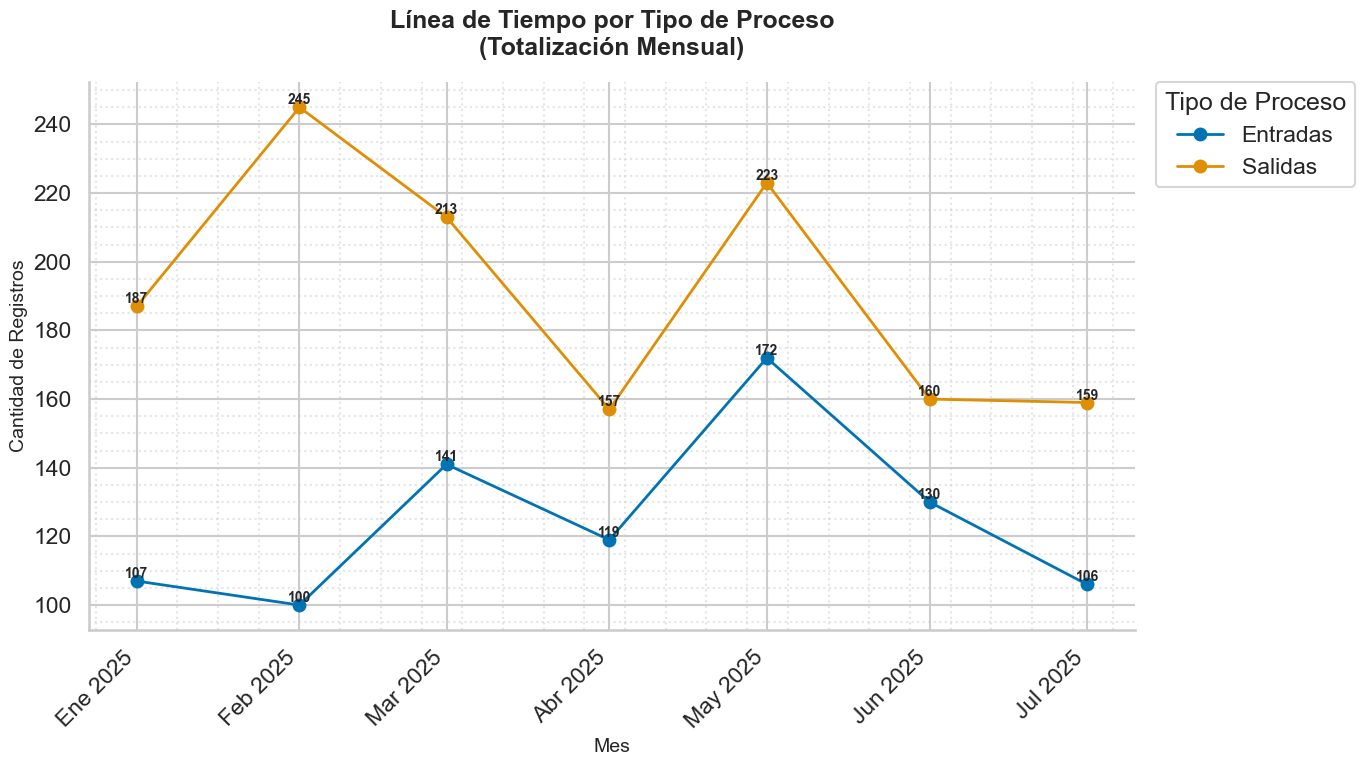

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Asegurarse de que la columna COL1 esté en formato de fecha
df_sat_limpio['COL1'] = pd.to_datetime(df_sat_limpio['COL1'], format='%d-%m-%Y', errors='coerce')

# Crear una nueva columna para el mes y año
df_sat_limpio['Mes_Año'] = df_sat_limpio['COL1'].dt.to_period('M')

# Agrupar por Mes_Año y tipo_Proceso, y contar los registros
totales_por_mes = df_sat_limpio.groupby(['Mes_Año', 'tipo_Proceso']).size().reset_index(name='Total')

# Pivotar los datos para que cada tipo_Proceso sea una columna
timeline = totales_por_mes.pivot(index='Mes_Año', columns='tipo_Proceso', values='Total').fillna(0)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Mapeo abreviado de meses en español
spanish_abbr = {
    1: 'Ene', 2: 'Feb', 3: 'Mar', 4: 'Abr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dic'
}

# Estilo y paleta
sns.set_theme(style="whitegrid", context="talk", palette="colorblind")

# Índice de fechas (Timestamp)
idx = timeline.index.to_timestamp()

fig, ax = plt.subplots(figsize=(14, 8))

for column in timeline.columns:
    y = timeline[column].values
    ax.plot(idx, y, marker='o', linewidth=2, label=column)
    # Etiqueta cada punto
    for x, val in zip(idx, y):
        ax.text(x, val, f"{int(val)}",
                va='bottom', ha='center',
                fontsize=10, fontweight='bold')

# Formato de eje X con etiquetas en español
ax.set_xticks(idx)
ax.set_xticklabels(
    [f"{spanish_abbr[d.month]} {d.year}" for d in idx],
    rotation=45,
    ha='right'
)

# Despine y grillas secundarias
sns.despine(ax=ax)
ax.minorticks_on()
ax.grid(which='minor', linestyle=':', alpha=0.5)

# Títulos y ejes
ax.set_title(
    'Línea de Tiempo por Tipo de Proceso\n(Totalización Mensual)',
    fontsize=18, fontweight='bold', pad=20
)
ax.set_xlabel('Mes', fontsize=14)
ax.set_ylabel('Cantidad de Registros', fontsize=14)

# Leyenda fuera del plot
ax.legend(
    title='Tipo de Proceso',
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0.
)

plt.tight_layout()
plt.show()
